# Exploratory Data Analysis
---------

## Importing Libraries:

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from datetime import datetime

import re

%matplotlib inline

-------
## Importing the SEC filings for Apple, Inc.

In [2]:
! ls data

Apple_SEC.csv         Apple_SEC_Scraper.csv Apple_SEC_clean.csv


In [3]:
company_name = 'Apple'

In [4]:
df = pd.read_csv(f'data/{company_name}_SEC.csv')

In [5]:
df.head()

,date,document_type,description,file_number
0,1994-01-26,424B5,Prospectus [Rule 424(b)(5)]Acc-no: 0000891618-...,033-6231094502696
1,1994-01-26,10-Q,Quarterly report [Sections 13 or 15(d)]Acc-no:...,000-1003094502732
2,1994-02-10,SC 13G/A,[Amend] Statement of acquisition of beneficial...,005-3363294505635
3,1994-02-17,SC 13G/A,[Amend] Statement of acquisition of beneficial...,005-3363294510471
4,1994-02-18,SC 13G,Statement of acquisition of beneficial ownersh...,005-3363200000000


## Inspecting the Data:

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 585 entries, 0 to 584
Data columns (total 4 columns):
date             585 non-null object
document_type    585 non-null object
description      585 non-null object
file_number      533 non-null object
dtypes: object(4)
memory usage: 18.4+ KB


In [7]:
df.describe()

,date,document_type,description,file_number
count,585,585,585,533
unique,509,37,585,533
top,2005-02-14,8-K,"Current report, items 2.02 and 9.01\nAcc-no: 0...",333-2371997560334
freq,4,164,1,1


-------

## Converting the Date Type into Date Time:

In [8]:
df['date'] = pd.to_datetime(df.date, dayfirst=True)
# df.set_index('Date', inplace=True)
# df.sort_index(inplace=True, ascending=True)
df.head(2)

,date,document_type,description,file_number
0,1994-01-26,424B5,Prospectus [Rule 424(b)(5)]Acc-no: 0000891618-...,033-6231094502696
1,1994-01-26,10-Q,Quarterly report [Sections 13 or 15(d)]Acc-no:...,000-1003094502732


-------

## Inspecting Missing Values:

- File Serial-Number Missing: 52

In [9]:
df.isnull().sum()

date              0
document_type     0
description       0
file_number      52
dtype: int64

## Displaying the Missing Values:

In [10]:
df[df['file_number'].isnull().sort_values(ascending=False)].head()

/Users/adamdelreal/anaconda3/envs/tensorflow/lib/python3.6/site-packages/ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


,date,document_type,description,file_number
11,1995-01-10,SC 13D/A,[Amend] General statement of acquisition of be...,NaN
13,1995-02-07,SC 13D/A,[Amend] General statement of acquisition of be...,NaN
23,1995-11-13,SC 13D/A,[Amend] General statement of acquisition of be...,NaN
24,1995-12-14,SC 13D/A,[Amend] General statement of acquisition of be...,NaN
25,1995-12-14,SC 13D/A,[Amend] General statement of acquisition of be...,NaN


## Dropping File Number:

In [11]:
df.drop('file_number', axis=1, inplace=True)

In [12]:
df.drop('description', axis=1, inplace=True)

In [13]:
df.head(2)

,date,document_type
0,1994-01-26,424B5
1,1994-01-26,10-Q


------
# Visualization:

## Plotting Document Types:

In [14]:
def count_plot(df, column):
    temp_df = df.copy()
    plt.figure(figsize=(14,7))
    sns.countplot(x=column, data=temp_df)
    plt.ylabel('Frequency', fontsize=14)
    plt.xlabel('Document Type', fontsize=14)
    plt.xticks(rotation=45, ha='right')
    plt.title('SEC Document Filings', fontsize=18)

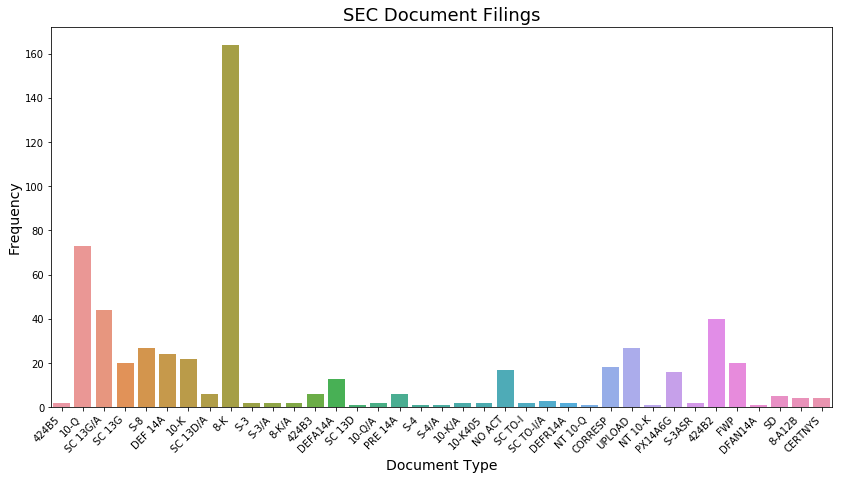

In [15]:
count_plot(df ,'document_type')

-------
# Feature Engineering:

## Creating Dummy Variables from the Document Types:

In [16]:
dummy = pd.get_dummies(df.document_type)
df = pd.concat([df, dummy], axis=1)

df.head()

,date,document_type,10-K,10-K/A,10-K405,10-Q,10-Q/A,424B2,424B3,424B5,...,S-4/A,S-8,SC 13D,SC 13D/A,SC 13G,SC 13G/A,SC TO-I,SC TO-I/A,SD,UPLOAD
0,1994-01-26,424B5,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
1,1994-01-26,10-Q,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1994-02-10,SC 13G/A,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
3,1994-02-17,SC 13G/A,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
4,1994-02-18,SC 13G,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0


-------



---------

## Saving onto a CSV:

In [17]:
df.to_csv(f'data/{company_name}_SEC_clean.csv', index=False)